In [1]:
import pandas as pd
df = pd.read_csv('data/Friends_A.tsv', sep='\t')
df.head()

,Unnamed: 0,scene_id,text,character,cAGR,dialog_state,sent,utterance,context,labels
0,0,01_e01_c01,"[['Ross Geller', "" No!! Okay?! Why does everyo...",Joey,1,"[0, 0, 0, 0, 0, 1, 1, 0]",No!! Okay?! Why does everyone keep fixating o...,"Alright Ross, look. You're feeling a lot of ...",No!! Okay?! Why does everyone keep fixating ...,1
1,1,01_e01_c02,"[['Monica Geller', "" Now I'm guessing that he ...",Chandler,1,"[0, 1, 0, 0, 0, 1, 0]",Now I'm guessing that he bought her the big p...,(imitating the characters) Tuna or egg salad...,Now I'm guessing that he bought her the big ...,1
2,2,01_e01_c04,"[['Ross Geller', "" (squatting and reading the ...",Chandler,0,"[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]",(squatting and reading the instructions) I'm ...,It's a beautiful thing. I would have to say...,(squatting and reading the instructions) I'm...,0
3,4,01_e01_c08,"[['Paul', ' Ever since she walked out on me, I...",Monica,1,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]","Ever since she walked out on me, I, uh... Wha...","What?..... What, you wanna spell it out with...","Ever since she walked out on me, I, uh... N...",1
4,5,01_e01_c11,"[['Rachel Green', "" Isn't this amazing? I mean...",Chandler,0,"[0, 1, 0, 0, 1, 0]","Isn't this amazing? I mean, I have never made...","That is amazing. If can invade Poland, ther...","Isn't this amazing? I mean, I have never mad...",0


In [22]:
df_c = pd.read_csv('data/Friends_C.tsv', sep='\t')
df_e = pd.read_csv('data/Friends_E.tsv', sep='\t')
df_o = pd.read_csv('data/Friends_O.tsv', sep='\t')
df_n = pd.read_csv('data/Friends_N.tsv', sep='\t')

df['cCON'] = df_c['cCON']
df['cEXT'] = df_e['cEXT']
df['cNEU'] = df_n['cNEU']
df['cOPN'] = df_o['cOPN']

In [48]:

from transformers import pipeline
emo_classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
# emo_classifier = pipeline("text-classification",model='tae898/emoberta-large', return_all_scores=True)
# emo_classifier = pipeline("text-classification",model='tae898/emoberta-base', return_all_scores=True)


/home/zhiyuan/ENTER/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:89: UserWarning: `return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality
  warnings.warn(


In [49]:
def get_emo(uttr):
    prediction = emo_classifier(uttr)
    max_score = 0
    label = 'neutral'
    for p in prediction:
        if p['score'] > max_score:
            label = p['label']
            max_score = p['score']

     #if max_score < 0.5:
     #   label = 'neutral'

    return label



def get_emo_list(list_uttr):
    try:
        return [get_emo(i[1]) for i in eval(list_uttr)]
    except:
        print(eval(list_uttr[0]))
    

# df['emoBERTa_large_labels'] = df['text'].apply(get_emo_list)
df['bert_labels'] = df['text'].apply(get_emo_list)
df.head()

,Unnamed: 0,scene_id,text,character,cAGR,dialog_state,sent,utterance,context,labels,emoBERTa_large_labels,cCON,cEXT,cNEU,cOPN,bert_labels
0,0,01_e01_c01,"[['Ross Geller', "" No!! Okay?! Why does everyo...",Joey,1,"[0, 0, 0, 0, 0, 1, 1, 0]",No!! Okay?! Why does everyone keep fixating o...,"Alright Ross, look. You're feeling a lot of ...",No!! Okay?! Why does everyone keep fixating ...,1,"[surprise, surprise, sadness, surprise, neutra...",1,0,1,0,"[joy, anger, joy, fear, sadness, anger, joy, joy]"
1,1,01_e01_c02,"[['Monica Geller', "" Now I'm guessing that he ...",Chandler,1,"[0, 1, 0, 0, 0, 1, 0]",Now I'm guessing that he bought her the big p...,(imitating the characters) Tuna or egg salad...,Now I'm guessing that he bought her the big ...,1,"[neutral, neutral, neutral, sadness, neutral, ...",0,1,1,1,"[joy, joy, joy, sadness, anger, anger, anger]"
2,2,01_e01_c04,"[['Ross Geller', "" (squatting and reading the ...",Chandler,0,"[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]",(squatting and reading the instructions) I'm ...,It's a beautiful thing. I would have to say...,(squatting and reading the instructions) I'm...,0,"[anger, neutral, joy, neutral, neutral, neutra...",0,0,1,0,"[anger, joy, joy, anger, anger, anger, fear, a..."
3,4,01_e01_c08,"[['Paul', ' Ever since she walked out on me, I...",Monica,1,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]","Ever since she walked out on me, I, uh... Wha...","What?..... What, you wanna spell it out with...","Ever since she walked out on me, I, uh... N...",1,"[sadness, neutral, neutral, surprise, neutral,...",0,1,1,1,"[anger, anger, joy, joy, anger, anger, anger, ..."
4,5,01_e01_c11,"[['Rachel Green', "" Isn't this amazing? I mean...",Chandler,0,"[0, 1, 0, 0, 1, 0]","Isn't this amazing? I mean, I have never made...","That is amazing. If can invade Poland, ther...","Isn't this amazing? I mean, I have never mad...",0,"[joy, joy, neutral, neutral, anger, neutral]",0,0,0,0,"[surprise, surprise, joy, joy, anger, joy]"


In [54]:
def get_emotion_transition(pairs, personality, bert=True):
    pairs = []
    tmp_df = df[df[personality] == 1]
    for i,r in tmp_df.iterrows():
        for j in range(len(eval(r['dialog_state']))-1):
            if (eval(r['dialog_state'])[j] == 0) and (eval(r['dialog_state'])[j+1] == 1):
                pairs.append([r['bert_labels'][j], r['bert_labels'][j+1]])
    if not bert:
        emo_transition_ = np.zeros([7,7])
        emo_list = ['neutral', 'joy', 'surprise', 'anger', 'sadness', 'fear', 'disgust']
        for pair in pairs:
            emo_transition_[emo_dict[pair[0]]][emo_dict[pair[1]]] += 1
        cap_emo_list = ['Neutral', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear', 'Disgust']
    else:
        emo_transition_ = np.zeros([6,6])
        emo_list = ['joy', 'surprise', 'anger', 'sadness', 'fear', 'disgust']
        for pair in pairs:
            emo_transition_[emo_dict[pair[0]]-1][emo_dict[pair[1]]-1] += 1
        cap_emo_list = ['Joy', 'Surprise', 'Anger', 'Sadness', 'Fear', 'Disgust']
    emo_transition_df = pd.DataFrame(emo_transition_, columns = cap_emo_list, index= cap_emo_list)
    emo_transition_ratio_df = emo_transition_df.div(emo_transition_df.sum(axis=1), axis=0)
    return emo_transition_df, emo_transition_ratio_df


import numpy as np


emo_dict = {
    'neutral':0,
    'joy':1,
    'surprise':2,
    'anger':3,
    'sadness':4,
    'fear':5,
    'disgust':6,
    'love':6
}    


 
emotion_transition = []
for p in ['cAGR', 'cCON', 'cEXT', 'cNEU', 'cOPN']:
    emo_transition_df, emo_transition_ratio_df = get_emotion_transition(pairs, p)
    emotion_transition.append(emo_transition_ratio_df)

In [52]:
emotion_transition[0]

,Joy,Surprise,Anger,Sadness,Fear,Disgust
Joy,231.0,10.0,204.0,27.0,34.0,9.0
Surprise,5.0,2.0,7.0,0.0,1.0,1.0
Anger,185.0,4.0,235.0,26.0,32.0,7.0
Sadness,32.0,0.0,24.0,8.0,0.0,3.0
Fear,42.0,0.0,35.0,5.0,9.0,3.0
Disgust,8.0,0.0,8.0,3.0,1.0,0.0


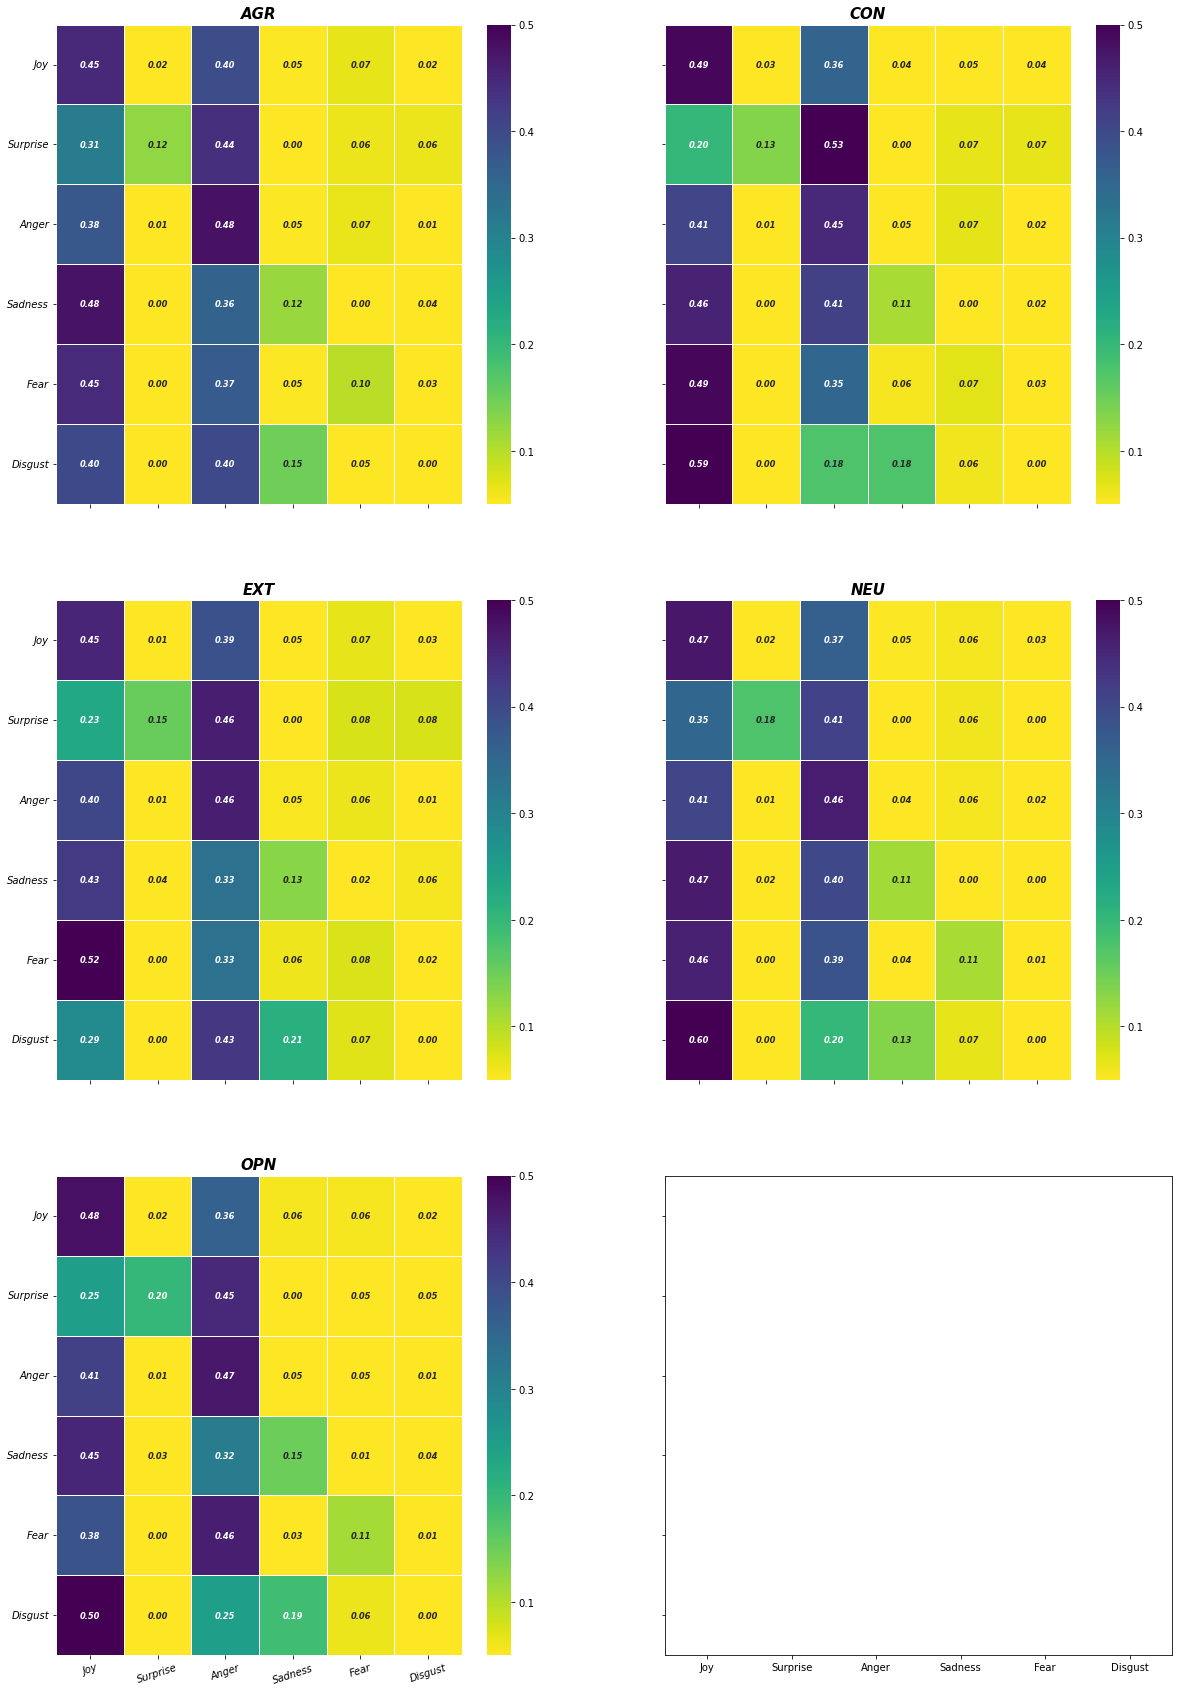

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np






# cbar_kws = { 'ticks' : [0, 0.1, 0.2, 0.3, 0.4, 0.5]}
annot_kws = {'weight': '650', 'size':'small', 'style': 'oblique'}


i = 0

## viridis_r, Pastel2_r, binary, mako_r, CMRmap_r, Blues

ps = ['cAGR', 'cCON', 'cEXT', 'cNEU', 'cOPN']
fig,axn = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(20, 30))
for ax in axn.flat:
    print()
    sns.heatmap(emotion_transition[i], linewidths=0.5, ax=ax, vmin=0.05, vmax=0.5, fmt='.2f', annot=True, cmap='viridis_r', \
                    cbar_kws=cbar_kws, annot_kws=annot_kws)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=-360, fontsize=10, fontstyle='oblique', fontweight='500')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=18, fontsize=10, fontstyle='oblique', fontweight='500')
    ax.set_title(ps[i][1:], fontsize=15, fontstyle='oblique', fontweight='600')
    i += 1
    if i == 5:
        break

plt.savefig('./Emotion_transitions_total.png', dpi=500)

In [57]:
df.head()

,Unnamed: 0,scene_id,text,character,cAGR,dialog_state,sent,utterance,context,labels,emoBERTa_large_labels,cCON,cEXT,cNEU,cOPN,bert_labels
0,0,01_e01_c01,"[['Ross Geller', "" No!! Okay?! Why does everyo...",Joey,1,"[0, 0, 0, 0, 0, 1, 1, 0]",No!! Okay?! Why does everyone keep fixating o...,"Alright Ross, look. You're feeling a lot of ...",No!! Okay?! Why does everyone keep fixating ...,1,"[surprise, surprise, sadness, surprise, neutra...",1,0,1,0,"[joy, anger, joy, fear, sadness, anger, joy, joy]"
1,1,01_e01_c02,"[['Monica Geller', "" Now I'm guessing that he ...",Chandler,1,"[0, 1, 0, 0, 0, 1, 0]",Now I'm guessing that he bought her the big p...,(imitating the characters) Tuna or egg salad...,Now I'm guessing that he bought her the big ...,1,"[neutral, neutral, neutral, sadness, neutral, ...",0,1,1,1,"[joy, joy, joy, sadness, anger, anger, anger]"
2,2,01_e01_c04,"[['Ross Geller', "" (squatting and reading the ...",Chandler,0,"[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]",(squatting and reading the instructions) I'm ...,It's a beautiful thing. I would have to say...,(squatting and reading the instructions) I'm...,0,"[anger, neutral, joy, neutral, neutral, neutra...",0,0,1,0,"[anger, joy, joy, anger, anger, anger, fear, a..."
3,4,01_e01_c08,"[['Paul', ' Ever since she walked out on me, I...",Monica,1,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]","Ever since she walked out on me, I, uh... Wha...","What?..... What, you wanna spell it out with...","Ever since she walked out on me, I, uh... N...",1,"[sadness, neutral, neutral, surprise, neutral,...",0,1,1,1,"[anger, anger, joy, joy, anger, anger, anger, ..."
4,5,01_e01_c11,"[['Rachel Green', "" Isn't this amazing? I mean...",Chandler,0,"[0, 1, 0, 0, 1, 0]","Isn't this amazing? I mean, I have never made...","That is amazing. If can invade Poland, ther...","Isn't this amazing? I mean, I have never mad...",0,"[joy, joy, neutral, neutral, anger, neutral]",0,0,0,0,"[surprise, surprise, joy, joy, anger, joy]"


In [65]:
ps = ['cAGR', 'cCON', 'cEXT', 'cNEU', 'cOPN']
emo_all = []
for p in ps:
    tmp_df = df[df[p] == 1]
    tmp_emo = np.zeros([7,1])
    for i,r in tmp_df.iterrows():
        for j in range(len(eval(r['dialog_state']))-1):
            if (eval(r['dialog_state'])[j] == 1):
                
                tmp_emo[emo_dict[r['emoBERTa_large_labels'][j]]] += 1
    print(tmp_emo)
    emo_all.append(tmp_emo/tmp_emo.sum())

emo_all


[[591.]
 [164.]
 [ 79.]
 [118.]
 [ 84.]
 [ 16.]
 [ 15.]]
[[465.]
 [193.]
 [ 86.]
 [ 67.]
 [ 51.]
 [ 13.]
 [  8.]]
[[495.]
 [129.]
 [ 74.]
 [ 75.]
 [ 68.]
 [ 17.]
 [  9.]]
[[523.]
 [177.]
 [ 73.]
 [ 80.]
 [ 70.]
 [ 20.]
 [  7.]]
[[665.]
 [189.]
 [ 97.]
 [109.]
 [ 77.]
 [ 21.]
 [ 14.]]


[array([[0.55388941],
        [0.15370197],
        [0.07403936],
        [0.11059044],
        [0.0787254 ],
        [0.01499531],
        [0.01405811]]),
 array([[0.52661382],
        [0.21857305],
        [0.09739524],
        [0.07587769],
        [0.05775764],
        [0.01472254],
        [0.00906002]]),
 array([[0.57093426],
        [0.14878893],
        [0.08535179],
        [0.08650519],
        [0.07843137],
        [0.01960784],
        [0.01038062]]),
 array([[0.55052632],
        [0.18631579],
        [0.07684211],
        [0.08421053],
        [0.07368421],
        [0.02105263],
        [0.00736842]]),
 array([[0.56740614],
        [0.1612628 ],
        [0.08276451],
        [0.09300341],
        [0.06569966],
        [0.01791809],
        [0.01194539]])]

          0       emo
0  0.553889   Neutral
1  0.153702       Joy
2  0.074039  Surprise
3  0.110590     Anger
4  0.078725   Sadness
5  0.014995      Fear
6  0.014058   Disgust
0
          0       emo
0  0.526614   Neutral
1  0.218573       Joy
2  0.097395  Surprise
3  0.075878     Anger
4  0.057758   Sadness
5  0.014723      Fear
6  0.009060   Disgust
1
          0       emo
0  0.570934   Neutral
1  0.148789       Joy
2  0.085352  Surprise
3  0.086505     Anger
4  0.078431   Sadness
5  0.019608      Fear
6  0.010381   Disgust
2
          0       emo
0  0.550526   Neutral
1  0.186316       Joy
2  0.076842  Surprise
3  0.084211     Anger
4  0.073684   Sadness
5  0.021053      Fear
6  0.007368   Disgust
3
          0       emo
0  0.567406   Neutral
1  0.161263       Joy
2  0.082765  Surprise
3  0.093003     Anger
4  0.065700   Sadness
5  0.017918      Fear
6  0.011945   Disgust
4


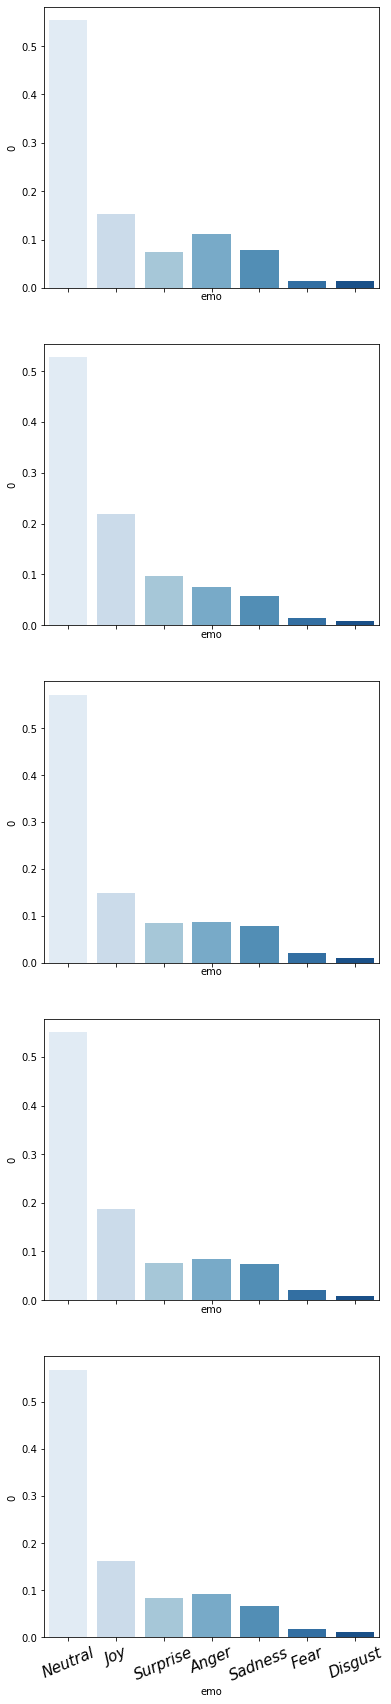

In [80]:
fig,axn = plt.subplots(5, 1, sharex=True, sharey=False, figsize=(6,30))
cap_emo_list = ['Neutral', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear', 'Disgust']
emos = np.arange(0,7)

cnt = 0
for ax in axn.flat:
    title = "STD of inf-norms"  if cnt == 0 else "STD of l2-norms"
    
    
    std_list = []


    std_df = pd.DataFrame(emo_all[cnt])
    std_df['emo'] = cap_emo_list

    print(std_df)
    sns.barplot(x="emo", y=0, data=std_df, palette=color, ax=ax)
    ax.set_xticklabels(std_df['emo'], rotation=23, fontsize=15, fontstyle='oblique', fontweight='550')

    print(cnt)

    cnt += 1

plt.savefig('./Emotion_std.png', dpi=600)

In [79]:
df.to_csv('big_5_analysis.tsv', sep='\t')